In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.drop(['Gender','User ID'],axis=1,inplace=True)

In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
ss = StandardScaler()

In [8]:
scaled_arr = ss.fit_transform(df.drop('Purchased',axis=1))

In [9]:
scaled_arr

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [10]:
X = pd.DataFrame(data=scaled_arr,columns=df.columns[:-1])

In [11]:
X.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [12]:
y = df['Purchased']

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
Age                400 non-null float64
EstimatedSalary    400 non-null float64
dtypes: float64(2)
memory usage: 6.3 KB


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 11 to 138
Data columns (total 2 columns):
Age                280 non-null float64
EstimatedSalary    280 non-null float64
dtypes: float64(2)
memory usage: 6.6 KB


In [17]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 364 to 143
Data columns (total 2 columns):
Age                120 non-null float64
EstimatedSalary    120 non-null float64
dtypes: float64(2)
memory usage: 2.8 KB


In [18]:
len(y_train)

280

In [21]:
len(y_test)

120

In [23]:
from sklearn.svm import SVC #applied Support Vector Classifier from Support Vector Machines ML algorithm

In [24]:
cl = SVC() #created object of Support Vector Classifier

In [25]:
cl.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
ypred = cl.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(ypred,y_test)

array([[67,  5],
       [ 7, 41]], dtype=int64)

In [29]:
narr = df.values

In [30]:
type(narr)

numpy.ndarray

In [31]:
narr.shape

(400, 3)

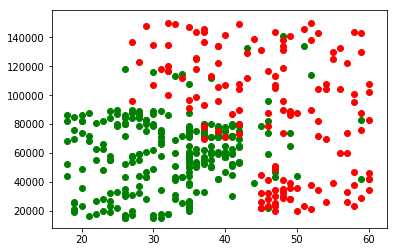

In [34]:
plt.scatter(narr[y==0,0],narr[y==0,1],color='green')
plt.scatter(narr[y==1,0],narr[y==1,1],color='red')